In [1]:
#Практична робота 9. Приклад побудови нейромережі tensorflow для датасета fashion_mnist

from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import utils
import matplotlib.pyplot as plt
import numpy as np
from keras import layers
from keras import models

In [2]:
num_classes = 10 # загальна кількість класів, у нашому випадку це цифри від 0 до 9
num_features = 784 # кількість атрибутів вхідного вектора 28*28 = 784

learning_rate = 0.001 # швидкість навчання нейронної мережі
training_steps = 3000 # максимальна кількість епох
batch_size = 256 # перераховувати ваги мережі ми будемо не на всій вибірці, а на її випадковому підтримці з batch_size елементів
display_step = 100 # кожні 100 ітерацій ми будемо показувати поточне значення функції втрат та точності

n_hidden_1 = 128 # кількість нейронів 1-го шару
n_hidden_2 = 256 # кількість нейронів 2-го шару

In [3]:
from tensorflow.keras.datasets import fashion_mnist

# Завантажуємо датасет
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

print("x_train original shape", x_train.shape)
print("y_train original shape", y_train.shape)

4422102/4422102 [==============================] - 0s 0us/step
x_train original shape (60000, 28, 28)
y_train original shape (60000,)


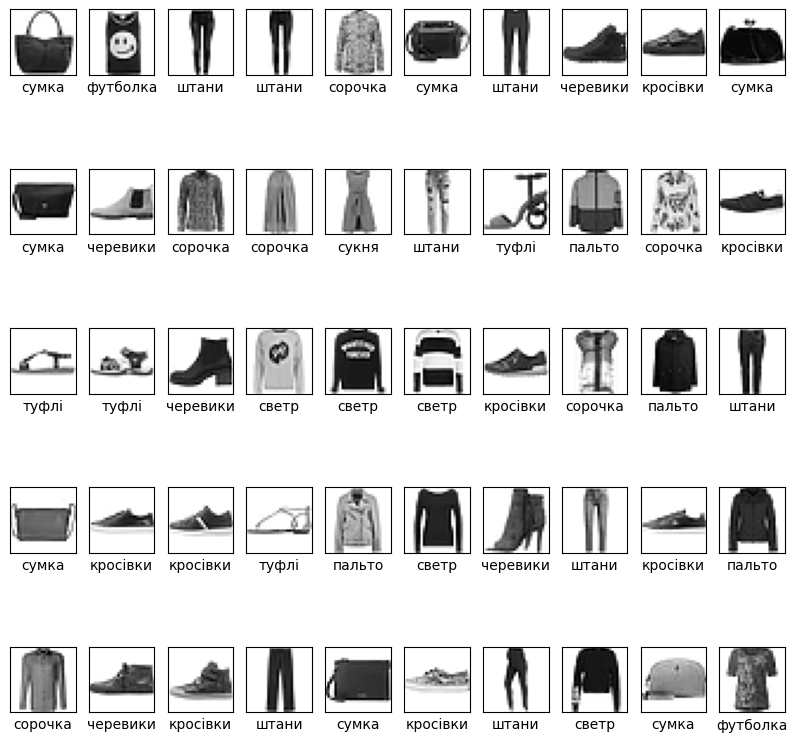

In [4]:
classes = ["футболка", "штани", "светр", "сукня", "пальто", "туфлі", "сорочка", "кросівки", "сумка", "черевики"]

plt.figure(figsize=(10,10))
for i in range(100,150):
    plt.subplot(5,10,i-100+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(classes[y_train[i]])

Нормалізація даних

In [5]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

print("Number of train data - " + str(len(x_train)))
print("Number of test data - " + str(len(x_test)))

Number of train data - 60000
Number of test data - 10000


Перетворення розмірності зображення

In [6]:
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# Перетворюємо з  (28, 28) у (28, 28, 1)
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_valid = x_valid.reshape(x_valid.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# Конвертуємо мітки в категорії
y_train = utils.to_categorical(y_train, 10)
y_valid = utils.to_categorical(y_valid, 10)
y_test = utils.to_categorical(y_test, 10)

print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

print(x_train.shape[0], 'train set')
print(x_valid.shape[0], 'validation set')
print(x_test.shape[0], 'test set')

x_train shape: (55000, 28, 28, 1) y_train shape: (55000, 10)
55000 train set
5000 validation set
10000 test set


Створення згорткової моделі нейронної мережі в бібліотеці Keras для розпізнавання та класифікації одягу на зображеннях з допомогою конволюційних шарів.

In [7]:
model = models.Sequential([
      layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1)),
      layers.MaxPooling2D(pool_size=2),
      layers.Dropout(0.3),
      layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'),
      layers.MaxPooling2D(pool_size=2),
      layers.Dropout(0.3),
      layers.Flatten(),
      layers.Dense(256, activation='relu'),
      layers.Dropout(0.5),
      layers.Dense(10, activation='softmax')
])

Відображення згорткової інформації про створену модель нейронної мережі, таку як кількість параметрів у кожному шарі та загальну кількість параметрів моделі.

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        8224      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 32)          0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 32)          0

Компіляція моделі нейронної мережі в середовищі Keras.

In [9]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

Використання бібліотеки Keras для створення ModelCheckpoint, який дозволяє зберігати найкращі параметри моделі під час її тренування.

In [10]:
from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose = 1, save_best_only=True)
model.fit(x_train,
         y_train,
         batch_size=64,
         epochs=10,
         validation_data=(x_valid, y_valid),
         callbacks=[checkpointer])

Epoch 1/10
859/860 [============================>.] - ETA: 0s - loss: 0.5985 - accuracy: 0.7812
Epoch 1: val_loss improved from inf to 0.36201, saving model to model.weights.best.hdf5
860/860 [==============================] - 79s 88ms/step - loss: 0.5984 - accuracy: 0.7812 - val_loss: 0.3620 - val_accuracy: 0.8730
Epoch 2/10
  2/860 [..............................] - ETA: 54s - loss: 0.4145 - accuracy: 0.8438

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


859/860 [============================>.] - ETA: 0s - loss: 0.4058 - accuracy: 0.8523
Epoch 2: val_loss improved from 0.36201 to 0.31898, saving model to model.weights.best.hdf5
860/860 [==============================] - 78s 90ms/step - loss: 0.4060 - accuracy: 0.8523 - val_loss: 0.3190 - val_accuracy: 0.8840
Epoch 3/10
859/860 [============================>.] - ETA: 0s - loss: 0.3639 - accuracy: 0.8675
Epoch 3: val_loss improved from 0.31898 to 0.29058, saving model to model.weights.best.hdf5
860/860 [==============================] - 76s 89ms/step - loss: 0.3639 - accuracy: 0.8675 - val_loss: 0.2906 - val_accuracy: 0.8940
Epoch 4/10
859/860 [============================>.] - ETA: 0s - loss: 0.3399 - accuracy: 0.8769
Epoch 4: val_loss improved from 0.29058 to 0.27053, saving model to model.weights.best.hdf5
860/860 [==============================] - 77s 89ms/step - loss: 0.3399 - accuracy: 0.8769 - val_loss: 0.2705 - val_accuracy: 0.8982
Epoch 5/10
859/860 [============================

Виведення точності моделі на тестовому наборі даних.

In [11]:
model.load_weights('model.weights.best.hdf5')
score = model.evaluate(x_test, y_test, verbose=0)

print('\n', 'Test accuracy:', round(score[1], 3))


 Test accuracy: 0.909


Візуалізація даних.

313/313 [==============================] - 3s 10ms/step


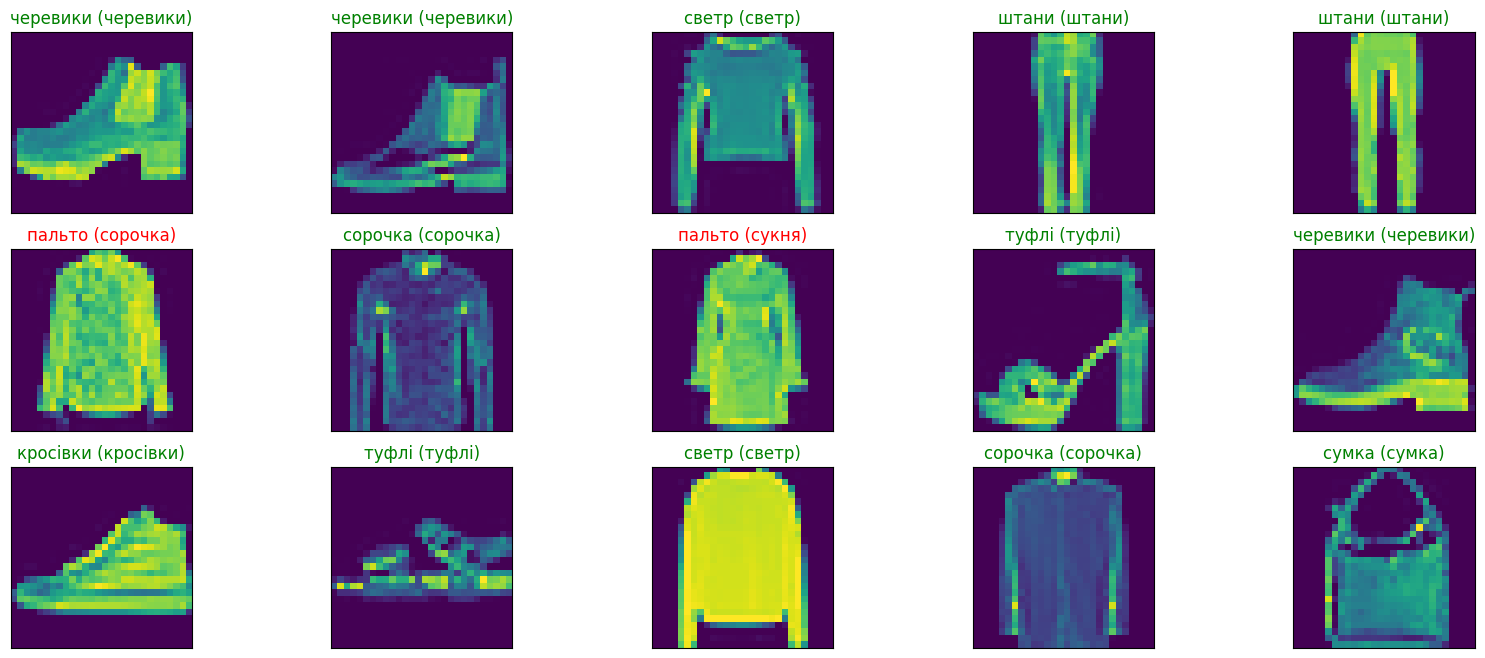

In [12]:
y_hat = model.predict(x_test)

figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])

    ax.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test[index])

    ax.set_title("{} ({})".format(classes[predict_index],
                                  classes[true_index]),
                                  color=("green" if predict_index == true_index else "red"))

Висновок. Під час практичної роботи 9 я ознайомився з датасетом fashion_mnist, який містить зображення 10 видів одягу: футболок, штанів, светрів, суконь, пальто, туфель, сорочок, кросівок, сумок і черевиків. Я побудував згорткову нейронну мережу з використанням низькорівневих механізмів tensorflow для класифікації цих видів одягу.